<a href="https://colab.research.google.com/github/GustaFTW/TensorFlow-ZTM/blob/main/section10_milestone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict

Let's write som TensorFlow code to predict the price of Bitcoin based on the historical price of Bitcoin.


Links:

* All resources: https://github.com/mrdbourke/tensorflow-deep-learning
* Book version of actual code/text: https://www.learntensorflow.io/



## Get data

We're going to be using the historical price data of Bitcoin to try and predict the future of Bitcoin, we downloaded the data from here: https://www.coindesk.com/price/bitcoin/

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-02-22 12:40:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2023-02-22 12:40:44 (82.3 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



## Importing time series with pandas

In [ ]:
# Import with pandas
import pandas as pd

# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # Parse the date column and use Date as a primary key
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
# How many samples?
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 years, but there's only 2987 samples.

Typically deep learning models usually like lots and lots of samples (where lots and lots can be thousands to tens of thouds to millions).

A smaller number of samples is something you'll often run into with time series data probles.

> **Note:** The **seasonality** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365 because we collect one sample per day meaning we'll get 365 samples per year.

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


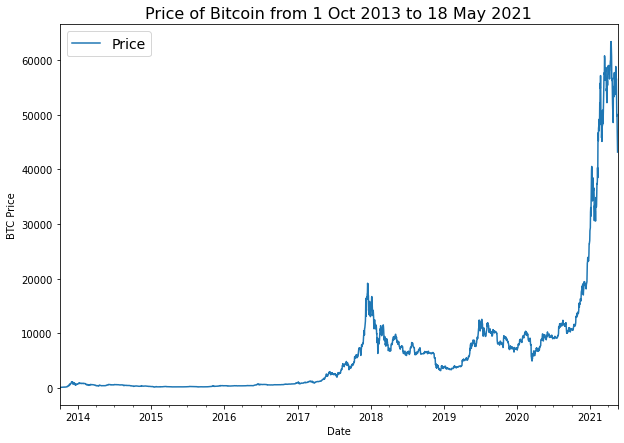

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

In [ ]:
import csv

python_df = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    python_df.append(row)

python_df

[['Currency',
  'Date',
  'Closing Price (USD)',
  '24h Open (USD)',
  '24h High (USD)',
  '24h Low (USD)'],
 ['BTC', '2013-10-01', '123.65499', '124.30466', '124.75166', '122.56349'],
 ['BTC', '2013-10-02', '125.455', '123.65499', '125.7585', '123.63383'],
 ['BTC', '2013-10-03', '108.58483', '125.455', '125.66566', '83.32833'],
 ['BTC', '2013-10-04', '118.67466', '108.58483', '118.675', '107.05816'],
 ['BTC', '2013-10-05', '121.33866', '118.67466', '121.93633', '118.00566'],
 ['BTC', '2013-10-06', '120.65533', '121.33866', '121.85216', '120.5545'],
 ['BTC', '2013-10-07', '121.795', '120.65533', '121.99166', '120.43199'],
 ['BTC', '2013-10-08', '123.033', '121.795', '123.64016', '121.35066'],
 ['BTC', '2013-10-09', '124.049', '123.033', '124.7835', '122.59266'],
 ['BTC', '2013-10-10', '125.96116', '124.049', '128.01683', '123.81966'],
 ['BTC', '2013-10-11', '125.27966', '125.96116', '126.43666', '124.11383'],
 ['BTC', '2013-10-12', '125.9275', '125.27966', '126.0365', '123.12966'],
 ['

## Importing time series data with Python's CSV module


In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as file:
  csv_reader = csv.reader(file, delimiter=",")
  next(csv_reader) # skip the header
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates
    btc_price.append(float(line[2])) # get the price
  
# View first 10 of each
timesteps[:10], btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

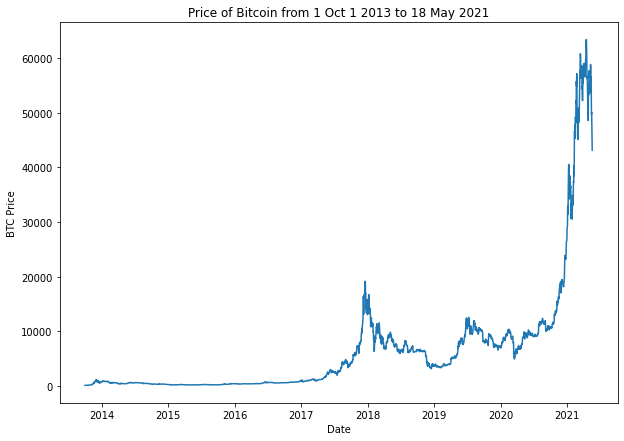

In [ ]:
# Plot from CSV
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 1 2013 to 18 May 2021")
plt.xlabel("Date")

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)


In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

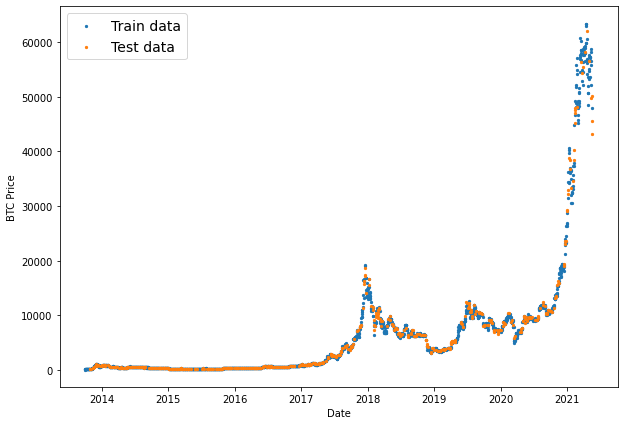

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

 ### Create train & test sets for time series (the right way)
 

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10. 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beoynd the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

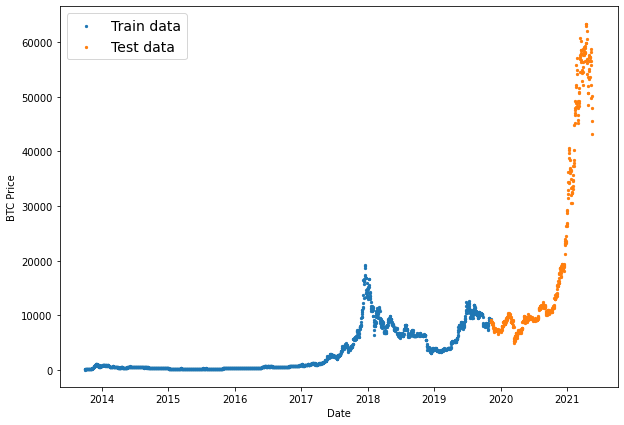

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

## Create a plotting function

Typing plotting code is tedious, let's functionize it.

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

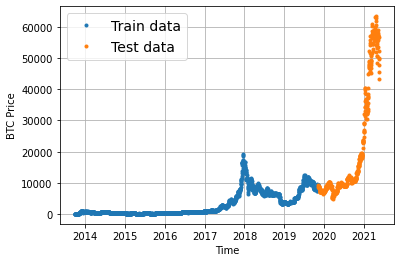

In [ ]:
# Test out plotting function
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modeliing Experiments

We've got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict horizon

Modelling experiments we're running:
* 0 Naive model (baseline)
* 1 Dense Model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon = 7, window = 23
* 4 Conv1D
* 5 LSTM
* 6 Same as 1 (but with multivariate data)
* 7 N-BEATs Algorithm
* 8 Ensemble (multiple models optimized on different loss functions)
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey data introduced)

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestept-1 (previous timestep) - this is for a horizon of 1. 

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

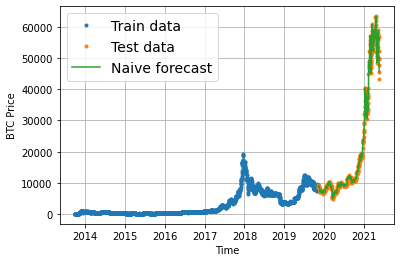

In [ ]:
# Plot naive forecast
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast")

> **Exercise:** Spend 10 minutes reading the simple forecasts chapter of Forecasting: Principles in Practice. And have a search to find out why the naive forecast is hard to beat, does the term autoregressive come up?

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing?

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics.

A few common regression metrics (which can also be used for time series forecasting):
* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root MSE
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error

For all of the above metrics, **lower is better**, for example, an MAE of 0 is better than an MAE of 100.

The main thing we're evaluating here is: **how do our model's forecasts (y_pred) compare against the actual values (y_true or ground truth values)?**



In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality of data).
    """
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

    return mae / mae_naive_no_season    

In [ ]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
    dic = {}
    y_true = tf.cast(y_true, dtype="float32")
    y_pred = tf.cast(y_pred, dtype="float32")
    # MAE
    dic["MAE"] = tf.keras.metrics.mean_absolute_error(y_true, y_pred).numpy()
    # MAPE
    dic["MAPE"] = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred).numpy()
    # MASE
    dic["MASE"] = mean_absolute_scaled_error(y_true, y_pred).numpy()
    # MSE
    dic["MSE"] = tf.keras.metrics.mean_squared_error(y_true, y_pred).numpy()
    # RMSE
    dic["RMSE"] = tf.sqrt(tf.keras.metrics.mean_squared_error(y_true, y_pred)).numpy()

    # Account for differente sized metrics (for longer horizons, we want to reduce metrics to a single value)
    if dic["MAE"].ndim > 0:
        dic["MAE"] = tf.reduce_mean(dic["MAE"]).numpy()
        dic["MSE"] = tf.reduce_mean(dic["MSE"]).numpy()
        dic["MAPE"] = tf.reduce_mean(dic["MAPE"]).numpy()
        dic["MASE"] = tf.reduce_mean(dic["MASE"]).numpy()
        dic["RMSE"] = tf.reduce_mean(dic["RMSE"]).numpy()

    return dic

That's one good looking evaluation function!

Let's now see if it works...

In [ ]:
naive_results = evaluate_preds(y_test[1:],
                               naive_forecast)
naive_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

## Other models you can use for baselines and for actual forecasts

In this notebook, we're focused on TensorFlow and deep learning models.

However there are plenty of other styles of time series forecasting models you may want to experiment with:
https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/#other_kinds-of-time-series-forecasting-models-which-can-be-used-for-baselines-and-actual-forecasts

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[1, 2, 3, 4, 5, 6, 7] -> [9]

```



In [ ]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} \nto predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] 
to predict this: 123.033


In [ ]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.
  
  E.g if horizon =1
  Input:[0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, hoever, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing.

Our function will:
1. Create a window step of specific window size (e.g. [0, 1, 2, 3, 4, 5, 6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6],
[1, 2, 3, 4, 5, 6, 7],
[2, 3, 4, 5, 6, 7, 8]]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the windows steps into windows with a specified horizon

In [ ]:
import numpy as np
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  
  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


There's a function which does similar to the above in tf.keras.preprocessing: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/timeseries_dataset_from_array

## Turning windows into training and test sets

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Splits matching pairs of windows and labels into test and train splits.
    """
    split_size = int(len(windows) * (1-test_split)) # this will equal 80% train 20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example, if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              verbose=0,
                                              monitor="val_loss",
                                              save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs 

Why these values?

I picked them out of experimentation.

* **Hyperparameters** = values a machine learning practitioner (you!) can adjust themselves
* **Parameters** = values a model learns on its own

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation its the same as nothing,
                                               # so basically we're getting the same values
                                               # that were outputted from the second dense layer
], name="model_1_dense") # name the model for the callback
 
# 2. Compile
model_1.compile(loss="mae",
                optimizer="adam",
                metrics=["mae", "mse"])

# 3. Fit
model_1.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1561.5505 - mae: 1561.5505 - mse: 8567122.0000  

18/18 [==============================] - 1s 39ms/step - loss: 1561.5505 - mae: 1561.5505 - mse: 8567122.0000 - val_loss: 2867.9546 - val_mae: 2867.9546 - val_mse: 18823390.0000
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 410.8714 - mae: 410.8714 - mse: 646688.3750

18/18 [==============================] - 1s 30ms/step - loss: 398.8549 - mae: 398.8549 - mse: 612458.9375 - val_loss: 1851.6854 - val_mae: 1851.6854 - val_mse: 8073450.0000
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 224.4781 - mae: 224.4781 - mse: 241499.5625

18/18 [==============================] - 1s 29ms/step - loss: 223.0214 - mae: 223.0214 - mse: 241722.2969 - val_loss: 1404.6353 - val_mae: 1404.6353 - val_mse: 5119850.0000
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 194.0635 - mae: 194.0635 - mse: 193939.8906

18/18 [==============================] - 0s 28ms/step - loss: 194.0635 - mae: 194.0635 - mse: 193939.8906 - val_loss: 1110.4193 - val_mae: 1110.4193 - val_mse: 3747719.2500
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 188.0569 - mae: 188.0569 - mse: 139902.6094

18/18 [==============================] - 0s 28ms/step - loss: 184.4243 - mae: 184.4243 - mse: 181599.6562 - val_loss: 1012.8165 - val_mae: 1012.8165 - val_mse: 3383387.7500
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 138.3836 - mae: 138.3836 - mse: 76145.1641

18/18 [==============================] - 0s 29ms/step - loss: 183.1685 - mae: 183.1685 - mse: 175963.9375 - val_loss: 993.2320 - val_mae: 993.2320 - val_mse: 3284321.5000
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 175.5190 - mae: 175.5190 - mse: 164025.6562 - val_loss: 999.3161 - val_mae: 999.3161 - val_mse: 3152982.0000
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 151.8954 - mae: 151.8954 - mse: 105027.6250

18/18 [==============================] - 1s 32ms/step - loss: 173.5976 - mae: 173.5976 - mse: 160329.5469 - val_loss: 950.4918 - val_mae: 950.4918 - val_mse: 3002966.0000
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 169.9865 - mae: 169.9865 - mse: 156917.9062 - val_loss: 1011.8524 - val_mae: 1011.8524 - val_mse: 3051032.7500
Epoch 10/100
14/18 [======================>.......] - ETA: 0s - loss: 162.6725 - mae: 162.6725 - mse: 137658.7656

18/18 [==============================] - 1s 41ms/step - loss: 166.7441 - mae: 166.7441 - mse: 147448.4688 - val_loss: 905.1918 - val_mae: 905.1918 - val_mse: 2713761.0000
Epoch 11/100
15/18 [========================>.....] - ETA: 0s - loss: 160.4219 - mae: 160.4219 - mse: 139278.5000

18/18 [==============================] - 1s 39ms/step - loss: 159.4053 - mae: 159.4053 - mse: 136685.5625 - val_loss: 845.1614 - val_mae: 845.1614 - val_mse: 2388606.2500
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 150.9893 - mae: 150.9893 - mse: 124487.8125 - val_loss: 849.3792 - val_mae: 849.3792 - val_mse: 2293018.5000
Epoch 13/100
13/18 [====================>.........] - ETA: 0s - loss: 145.6152 - mae: 145.6152 - mse: 116370.3281

18/18 [==============================] - 1s 33ms/step - loss: 148.0555 - mae: 148.0555 - mse: 121268.9766 - val_loss: 830.8236 - val_mae: 830.8236 - val_mse: 2193068.5000
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 153.6454 - mae: 153.6454 - mse: 115279.4062

18/18 [==============================] - 0s 27ms/step - loss: 142.9644 - mae: 142.9644 - mse: 113710.6016 - val_loss: 812.3641 - val_mae: 812.3641 - val_mse: 2096396.2500
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 141.8093 - mae: 141.8093 - mse: 73593.4062

18/18 [==============================] - 0s 28ms/step - loss: 143.2376 - mae: 143.2376 - mse: 111276.6328 - val_loss: 761.4563 - val_mae: 761.4563 - val_mse: 1950662.5000
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 122.7446 - mae: 122.7446 - mse: 65677.3828

18/18 [==============================] - 0s 26ms/step - loss: 136.8196 - mae: 136.8196 - mse: 103468.0625 - val_loss: 746.8875 - val_mae: 746.8875 - val_mse: 1861100.5000
Epoch 17/100
18/18 [==============================] - ETA: 0s - loss: 136.8641 - mae: 136.8641 - mse: 104014.8828

18/18 [==============================] - 0s 27ms/step - loss: 136.8641 - mae: 136.8641 - mse: 104014.8828 - val_loss: 731.8682 - val_mae: 731.8682 - val_mse: 1787519.6250
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 134.7006 - mae: 134.7006 - mse: 100622.4922 - val_loss: 775.9058 - val_mae: 775.9058 - val_mse: 1865941.0000
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 130.7724 - mae: 130.7724 - mse: 95145.4688 - val_loss: 746.0884 - val_mae: 746.0884 - val_mse: 1761735.0000
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 144.0799 - mae: 144.0799 - mse: 114404.3125

18/18 [==============================] - 0s 27ms/step - loss: 128.8203 - mae: 128.8203 - mse: 91902.0938 - val_loss: 700.3844 - val_mae: 700.3845 - val_mse: 1675827.7500
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 160.7052 - mae: 160.7052 - mse: 115716.6250

18/18 [==============================] - 0s 28ms/step - loss: 129.0187 - mae: 129.0187 - mse: 94391.8672 - val_loss: 677.7676 - val_mae: 677.7676 - val_mse: 1573570.1250
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 125.4668 - mae: 125.4668 - mse: 89614.4062 - val_loss: 704.3323 - val_mae: 704.3323 - val_mse: 1600950.5000
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 132.1071 - mae: 132.1071 - mse: 92946.3984 - val_loss: 723.4095 - val_mae: 723.4095 - val_mse: 1637547.0000
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 142.2103 - mae: 142.2103 - mse: 84236.3906

18/18 [==============================] - 0s 27ms/step - loss: 124.2185 - mae: 124.2185 - mse: 86702.8594 - val_loss: 663.8944 - val_mae: 663.8944 - val_mse: 1482638.7500
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 138.7118 - mae: 138.7118 - mse: 81148.2109

18/18 [==============================] - 0s 29ms/step - loss: 120.4804 - mae: 120.4804 - mse: 84379.0625 - val_loss: 642.4428 - val_mae: 642.4428 - val_mse: 1428785.2500
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 120.2678 - mae: 120.2678 - mse: 83321.3281

18/18 [==============================] - 0s 28ms/step - loss: 120.2678 - mae: 120.2678 - mse: 83321.3281 - val_loss: 636.6004 - val_mae: 636.6004 - val_mse: 1405385.7500
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 159.3704 - mae: 159.3704 - mse: 121636.0078

18/18 [==============================] - 0s 28ms/step - loss: 121.9242 - mae: 121.9242 - mse: 83022.9297 - val_loss: 630.3369 - val_mae: 630.3369 - val_mse: 1391663.3750
Epoch 28/100
17/18 [===========================>..] - ETA: 0s - loss: 118.4973 - mae: 118.4973 - mse: 82485.4688

18/18 [==============================] - 0s 29ms/step - loss: 118.2386 - mae: 118.2386 - mse: 81507.2891 - val_loss: 624.7438 - val_mae: 624.7438 - val_mse: 1363223.0000
Epoch 29/100
16/18 [=========================>....] - ETA: 0s - loss: 116.8090 - mae: 116.8090 - mse: 78416.2344 

18/18 [==============================] - 0s 28ms/step - loss: 118.0776 - mae: 118.0776 - mse: 80163.6250 - val_loss: 618.2538 - val_mae: 618.2538 - val_mse: 1344205.8750
Epoch 30/100
18/18 [==============================] - 0s 5ms/step - loss: 122.2951 - mae: 122.2951 - mse: 83678.1719 - val_loss: 618.9846 - val_mae: 618.9846 - val_mse: 1348204.2500
Epoch 31/100
14/18 [======================>.......] - ETA: 0s - loss: 114.6859 - mae: 114.6859 - mse: 76062.6328

18/18 [==============================] - 1s 29ms/step - loss: 116.1369 - mae: 116.1369 - mse: 77075.7500 - val_loss: 610.4686 - val_mae: 610.4686 - val_mse: 1314750.8750
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 116.0590 - mae: 116.0590 - mse: 78324.0703 - val_loss: 627.3022 - val_mae: 627.3022 - val_mse: 1338893.2500
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 114.9784 - mae: 114.9784 - mse: 77328.4609 - val_loss: 623.8626 - val_mae: 623.8626 - val_mse: 1327087.6250
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 133.4142 - mae: 133.4142 - mse: 119155.0469

18/18 [==============================] - 0s 27ms/step - loss: 115.5472 - mae: 115.5472 - mse: 79047.8125 - val_loss: 603.5181 - val_mae: 603.5181 - val_mse: 1293312.5000
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 113.0556 - mae: 113.0556 - mse: 77045.6797 - val_loss: 618.7497 - val_mae: 618.7497 - val_mse: 1331474.1250
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 117.7222 - mae: 117.7222 - mse: 78410.6953 - val_loss: 628.1134 - val_mae: 628.1134 - val_mse: 1353994.3750
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3939 - mae: 116.3939 - mse: 79347.7812 - val_loss: 604.7975 - val_mae: 604.7975 - val_mse: 1270729.2500
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0124 - mae: 116.0124 - mse: 76745.3594 - val_loss: 639.8285 - val_mae: 639.8285 - val_mse: 1374122.3750
Epoch 39/100
18/18 [==============================] - ETA: 0s - loss: 114.1856 - mae: 114.1856 - mse: 

18/18 [==============================] - 0s 28ms/step - loss: 114.1856 - mae: 114.1856 - mse: 75732.8359 - val_loss: 590.6097 - val_mae: 590.6097 - val_mse: 1239654.0000
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6067 - mae: 111.6067 - mse: 74370.7734 - val_loss: 600.4371 - val_mae: 600.4371 - val_mse: 1270908.7500
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7294 - mae: 111.7294 - mse: 75225.3281 - val_loss: 638.7217 - val_mae: 638.7217 - val_mse: 1358975.5000
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0803 - mae: 116.0803 - mse: 77571.5859 - val_loss: 618.3349 - val_mae: 618.3349 - val_mse: 1292037.1250
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0757 - mae: 112.0757 - mse: 73092.6484 - val_loss: 591.2603 - val_mae: 591.2603 - val_mse: 1242701.1250
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8090 - mae: 111.8090 - m

18/18 [==============================] - 0s 27ms/step - loss: 110.5549 - mae: 110.5549 - mse: 72729.9531 - val_loss: 579.4844 - val_mae: 579.4844 - val_mse: 1208967.3750
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7815 - mae: 110.7815 - mse: 73096.6875 - val_loss: 637.1329 - val_mae: 637.1329 - val_mse: 1328879.6250
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 113.9359 - mae: 113.9359 - mse: 75541.1719 - val_loss: 582.4878 - val_mae: 582.4878 - val_mse: 1208097.1250
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5250 - mae: 112.5250 - mse: 74721.0078 - val_loss: 628.0998 - val_mae: 628.0998 - val_mse: 1305064.1250
Epoch 49/100
18/18 [==============================] - 0s 8ms/step - loss: 116.3557 - mae: 116.3557 - mse: 76482.7031 - val_loss: 583.8055 - val_mae: 583.8055 - val_mse: 1208417.8750
Epoch 50/100
18/18 [==============================] - 0s 8ms/step - loss: 115.9618 - mae: 115.9618 - m

18/18 [==============================] - 1s 83ms/step - loss: 118.3607 - mae: 118.3607 - mse: 80080.9844 - val_loss: 572.6190 - val_mae: 572.6190 - val_mse: 1185149.0000
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2786 - mae: 112.2786 - mse: 73436.5625 - val_loss: 868.9101 - val_mae: 868.9101 - val_mse: 2083208.2500
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 143.0979 - mae: 143.0979 - mse: 98109.6953 - val_loss: 772.1129 - val_mae: 772.1129 - val_mse: 1740072.0000
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 130.2008 - mae: 130.2008 - mse: 85509.3203 - val_loss: 683.4501 - val_mae: 683.4501 - val_mse: 1454194.7500
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 82.7866 - mae: 82.7866 - mse: 32602.6602

18/18 [==============================] - 0s 28ms/step - loss: 110.6263 - mae: 110.6263 - mse: 72034.5391 - val_loss: 571.1712 - val_mae: 571.1712 - val_mse: 1186655.7500
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3090 - mae: 109.3090 - mse: 72332.6016 - val_loss: 573.9797 - val_mae: 573.9797 - val_mse: 1184682.1250
Epoch 61/100
18/18 [==============================] - 0s 6ms/step - loss: 108.5964 - mae: 108.5964 - mse: 72173.4375 - val_loss: 577.7117 - val_mae: 577.7117 - val_mse: 1188617.2500
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7083 - mae: 109.7083 - mse: 71294.7969 - val_loss: 585.1577 - val_mae: 585.1577 - val_mse: 1209041.5000
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8076 - mae: 109.8076 - mse: 72632.7422 - val_loss: 588.1579 - val_mae: 588.1579 - val_mse: 1207309.8750
Epoch 64/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4990 - mae: 109.4990 - m

18/18 [==============================] - 0s 28ms/step - loss: 119.8147 - mae: 119.8147 - mse: 76301.6484 - val_loss: 565.5188 - val_mae: 565.5188 - val_mse: 1168254.7500
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 87.4308 - mae: 87.4308 - mse: 46505.9219

18/18 [==============================] - 1s 30ms/step - loss: 110.2202 - mae: 110.2202 - mse: 70512.6641 - val_loss: 565.0157 - val_mae: 565.0157 - val_mse: 1166484.7500
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 109.5949 - mae: 109.5949 - mse: 71870.2188 - val_loss: 572.7136 - val_mae: 572.7136 - val_mse: 1180488.0000
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2422 - mae: 113.2422 - mse: 73543.5703 - val_loss: 620.2870 - val_mae: 620.2870 - val_mse: 1277659.3750
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5216 - mae: 109.5216 - mse: 71932.6016 - val_loss: 572.1190 - val_mae: 572.1190 - val_mse: 1177514.1250
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9194 - mae: 109.9194 - mse: 72154.7734 - val_loss: 588.8640 - val_mae: 588.8640 - val_mse: 1204102.2500
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 78.8710 - mae: 78.8710 - mse: 27

18/18 [==============================] - 0s 28ms/step - loss: 110.2858 - mae: 110.2858 - mse: 72367.6641 - val_loss: 564.6160 - val_mae: 564.6160 - val_mse: 1159742.0000
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0559 - mae: 107.0559 - mse: 69814.8672 - val_loss: 565.5529 - val_mae: 565.5529 - val_mse: 1164369.2500
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1904 - mae: 110.1904 - mse: 69807.3203 - val_loss: 623.0062 - val_mae: 623.0062 - val_mse: 1280555.3750
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 113.4814 - mae: 113.4814 - mse: 56002.3359

18/18 [==============================] - 0s 29ms/step - loss: 110.8466 - mae: 110.8466 - mse: 73923.4453 - val_loss: 562.9631 - val_mae: 562.9631 - val_mse: 1157728.2500
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3687 - mae: 107.3687 - mse: 70805.7422 - val_loss: 573.5106 - val_mae: 573.5106 - val_mse: 1172219.6250
Epoch 81/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3306 - mae: 107.3306 - mse: 70226.0625 - val_loss: 563.6993 - val_mae: 563.6993 - val_mse: 1156802.5000
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 118.7040 - mae: 118.7040 - mse: 79083.2969 - val_loss: 567.6186 - val_mae: 567.6186 - val_mse: 1165976.8750
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5899 - mae: 112.5899 - mse: 73253.9219 - val_loss: 695.5472 - val_mae: 695.5472 - val_mse: 1469508.3750
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5013 - mae: 114.5013 - m

18/18 [==============================] - 0s 28ms/step - loss: 108.4900 - mae: 108.4900 - mse: 71112.5703 - val_loss: 562.2551 - val_mae: 562.2551 - val_mse: 1152010.3750
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 120.3277 - mae: 120.3277 - mse: 74776.2656 - val_loss: 771.3924 - val_mae: 771.3924 - val_mse: 1679227.8750


In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 771.3924 - mae: 771.3924 - mse: 1679227.3750


[771.3923950195312, 771.3923950195312, 1679227.375]

In [ ]:
# Load in saved best performing model_1 and evaluat eit on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 562.2549 - mae: 562.2549 - mse: 1152010.5000


[562.2549438476562, 562.2549438476562, 1152010.5]

In [ ]:
naive_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

## Making pseudo forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only pseudo forecasts because actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [ ]:
def make_preds(model, input_data):
    """
    Uses model to make predictions input_data
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions


In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8844.595, 8786.941, 9031.514, 8784.747, 8754.63 , 8722.671,
        8671.026, 8544.107, 8447.476, 8529.358], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(tf.squeeze(test_labels, axis=1), model_1_preds)
model_1_results

{'MAE': 562.255,
 'MAPE': 2.5097995,
 'MASE': 0.98772633,
 'MSE': 1152010.6,
 'RMSE': 1073.3175}

In [ ]:
naive_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

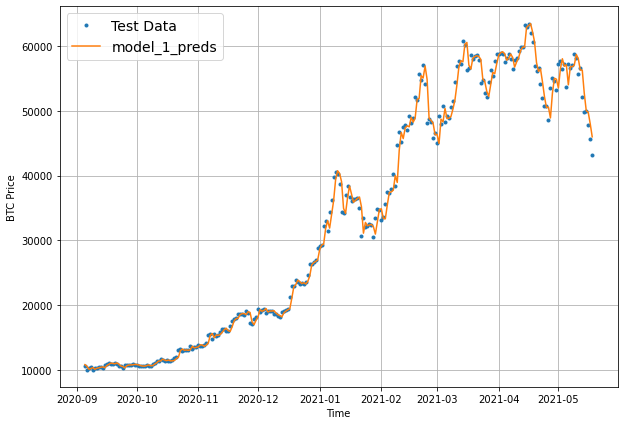

In [ ]:
# Let's plot out model 1 predictions
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [ ]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, 
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2_dense")

# Compile the model
model_2.compile(loss="mae",
                optimizer="adam")

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_2.name)])

In [ ]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 731.8924


731.8923950195312

In [ ]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 599.0027


599.002685546875

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 1ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_2_preds)
model_2_results

{'MAE': 599.00275,
 'MAPE': 2.6846516,
 'MASE': 1.0470626,
 'MSE': 1257013.8,
 'RMSE': 1121.1663}

In [ ]:
model_1_results

{'MAE': 562.255,
 'MAPE': 2.5097995,
 'MASE': 0.98772633,
 'MSE': 1152010.6,
 'RMSE': 1073.3175}

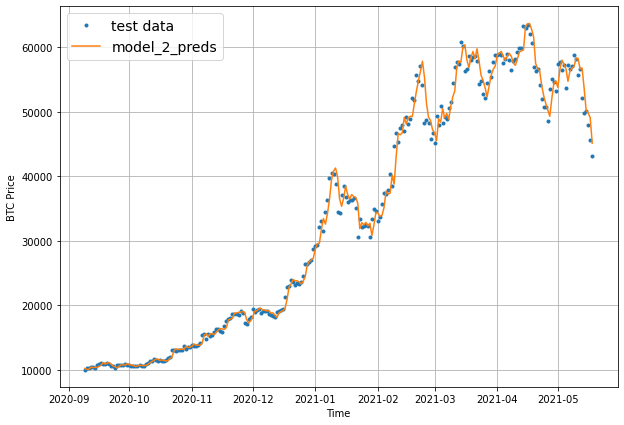

In [ ]:
offset = 300 
plt.figure(figsize=(10, 7))
# Account for test_windows offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)


In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_3_dense")

# Compile the model
model_3.compile(loss="mae",
                optimizer="adam")

# Fit the model
model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_3.name)])

In [ ]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1389.2694


1389.2694091796875

In [ ]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1246.8636


1246.8636474609375

In [ ]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           test_windows)
model_3_preds[:2]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(2, 7), dtype=float32, numpy=
array([[9344.84  , 9143.515 , 9180.118 , 9267.331 , 9428.2295, 9613.42  ,
        9535.826 ],
       [9003.471 , 8932.749 , 8924.854 , 9005.756 , 9161.399 , 9326.041 ,
        9131.564 ]], dtype=float32)>

In [ ]:
# After fixing our evaluate_preds function to handle multidimensional preds, we check the results
model_3_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_3_preds)
model_3_results

{'MAE': 1246.8636,
 'MAPE': 5.6696534,
 'MASE': 2.218724,
 'MSE': 5457903.5,
 'RMSE': 1440.583}

We've made and evaluated predictions with `model_3`, let's visualize, visualize, visualize!

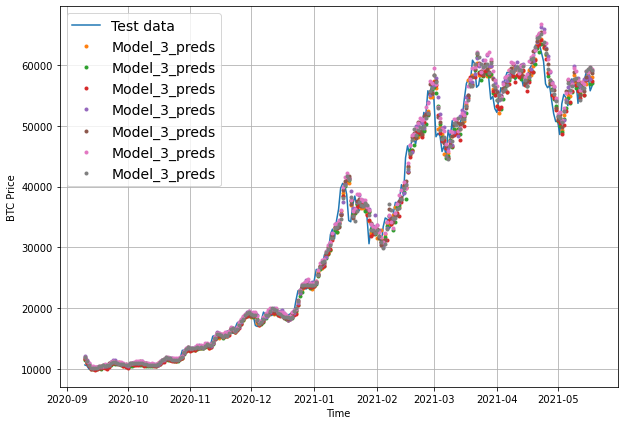

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="Model_3_preds")

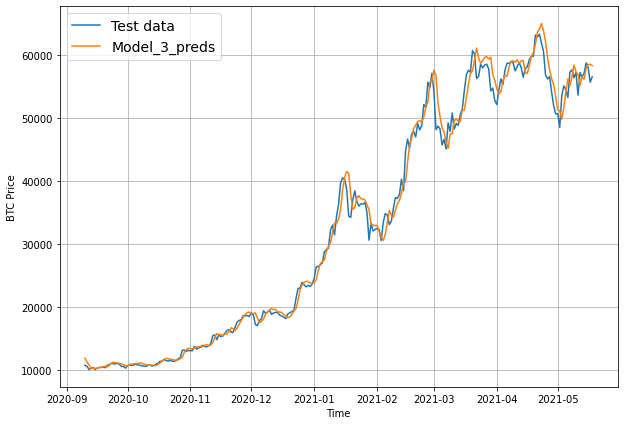

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, format="-", label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="Model_3_preds")

## Which of our models is performing the best so far?

So we've trained a few models, now let's compare them and see how they've gone...

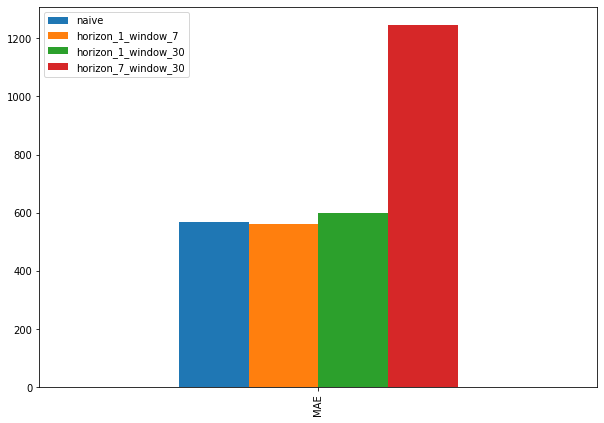

In [ ]:
pd.DataFrame({"naive": naive_results["MAE"],
              "horizon_1_window_7": model_1_results["MAE"],
              "horizon_1_window_30": model_2_results["MAE"],
              "horizon_7_window_30": model_3_results["MAE"]}, index=["MAE"]).plot(figsize=(10, 7), kind="bar")

## Model 4: Conv1D



In [ ]:
HORIZON = 1 # predict next day of bitcoin prize
WINDOW_SIZE = 7 # using the previous week

In [ ]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

To use the Conv1D layer, We need an input shape of: `(batch_size, timesteps, input_dim)`

However our data isn't in that shape yet...

In [ ]:
# Check data input shape
train_windows[0].shape # returns WINDOW_SIZE

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for `input_dim`

In [ ]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") # (WINDIW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n{expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x : tf.expand_dims(x, axis=1)),
    layers.Conv1D(128, kernel_size=5, padding="causal", activation="relu"),
    layers.Dense(HORIZON, activation="linear"),
], name="model_4_conv1D")

# Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            validation_data=(test_windows, test_labels),
            verbose=0,
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_185 (Dense)           (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate model...
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 671.3776


671.3776245117188

In [ ]:
# Load back the best model and reavaluate it
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1D")

In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 566.5502


566.5502319335938

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8876.605, 8797.47 , 9017.206, 8787.211, 8754.365, 8734.767,
       8677.974, 8546.57 , 8459.689, 8526.475], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_4_preds)
model_4_results

{'MAE': 566.5503,
 'MAPE': 2.5297472,
 'MASE': 0.9952719,
 'MSE': 1168737.6,
 'RMSE': 1081.0817}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

We'll use the same data we created previously.


In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON, activation="linear")(x)
model_5 = tf.keras.Model(inputs, output, name="model_5_LSTM")

# Compile the model
model_5.compile(loss="mae",
                 optimizer="adam")

# Fit the model
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 135ms/step - loss: 2363.3962 - val_loss: 10675.0605
Epoch 2/100
18/18 [==============================] - 2s 96ms/step - loss: 962.0915 - val_loss: 1010.9478
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 249.0168 - val_loss: 1292.5806
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 196.1208 - val_loss: 1026.6896
Epoch 5/100
18/18 [==============================] - 2s 99ms/step - loss: 181.3809 - val_loss: 998.7480
Epoch 6/100
18/18 [==============================] - 2s 97ms/step - loss: 181.3319 - val_loss: 989.3433
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 178.2830 - val_loss: 1000.1149
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 174.9374 - val_loss: 995.6049
Epoch 9/100
18/18 [==============================] - 2s 96ms/step - loss: 172.6664 - val_loss: 989.2644
Epoch 10/100
18/18 [==============================] - 2s 103

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 581.8704


581.8704223632812

In [ ]:
# Make predictions with out LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8935.5  , 8809.782, 8988.512, 8790.297, 8749.899], dtype=float32)>

In [ ]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_5_preds)
model_5_results

{'MAE': 581.8704,
 'MAPE': 2.6154387,
 'MASE': 1.0221852,
 'MSE': 1220273.2,
 'RMSE': 1104.6598}

## Make a multivariate time series dataset

Before we add a feature to our time series, what is a feature we can use?

One feature we could add is whether or not Daniel Bourke tweeted on that day...

* day 1 - 0
* day 2 - 1
* day 3 - 0

What's a better feature to use?

How about the bitcoin halving events?


In [ ]:
# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # 3 January 2009 - this block reward isn't in our dataset (our data starts in october 2013)
block_reward_2 = 25 # 8 November 2012 (also won't be used)
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# Add in  a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


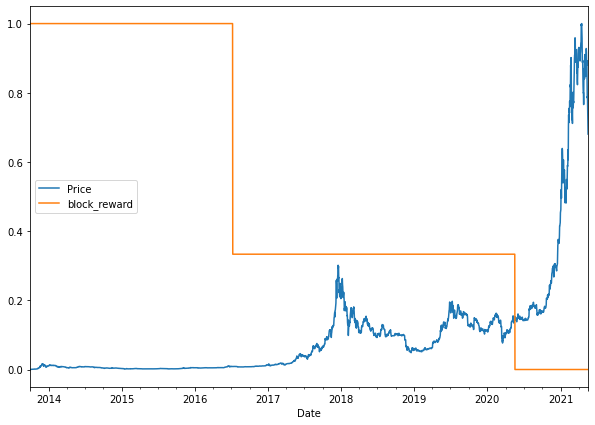

In [ ]:
# Plot the block reward vs price overtime
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                                  columns=bitcoin_prices_block.columns,
                                                  index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7))

## Making  a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed dataset using the helper functions above.

However, since we've got multivariate data, these functions won't work.

Not to worry, we can use the pandas.DataFrame.shift() method to window our multivariate data.


In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the Bitcoin historical data with block reawrad feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # shift values for each step in WINDOW_SIZE
   bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we've done is created a way to window our dataset directly from a pandas dataframe.

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [ ]:
# Create X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear") # linear activation its the same as nothing,
                                               # so basically we're getting the same values
                                               # that were outputted from the second dense layer
], name="model_6_dense") # name the model for the callback
 
# 2. Compile
model_6.compile(loss="mae",
                optimizer="adam")

# 3. Fit
model_6.fit(X_train,
            y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 12s - loss: 3596.9937

18/18 [==============================] - 1s 34ms/step - loss: 1440.0547 - val_loss: 3052.2356
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 453.6390

18/18 [==============================] - 0s 26ms/step - loss: 356.4854 - val_loss: 1394.6193
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 183.4021

18/18 [==============================] - 0s 26ms/step - loss: 203.8473 - val_loss: 1226.8557
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 243.9639

18/18 [==============================] - 0s 25ms/step - loss: 183.4594 - val_loss: 972.7425
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 184.0859

18/18 [==============================] - 0s 25ms/step - loss: 170.1602 - val_loss: 949.7258
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 120.1363

18/18 [==============================] - 0s 26ms/step - loss: 167.1795 - val_loss: 910.8264
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 205.9002

18/18 [==============================] - 0s 25ms/step - loss: 154.6815 - val_loss: 840.0807
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 118.2701

18/18 [==============================] - 0s 25ms/step - loss: 149.9668 - val_loss: 834.6146
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 128.7845

18/18 [==============================] - 0s 24ms/step - loss: 151.6645 - val_loss: 811.2593
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 144.9082

18/18 [==============================] - 0s 26ms/step - loss: 144.6283 - val_loss: 791.2177
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 145.5365

18/18 [==============================] - 0s 26ms/step - loss: 140.8208 - val_loss: 781.2989
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 139.4114 - val_loss: 878.9159
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 143.6466 - val_loss: 782.7886
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 137.3675

18/18 [==============================] - 0s 26ms/step - loss: 135.4117 - val_loss: 757.6485
Epoch 15/100
17/18 [===========================>..] - ETA: 0s - loss: 136.5014

18/18 [==============================] - 0s 25ms/step - loss: 136.2539 - val_loss: 727.1531
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 117.9892

18/18 [==============================] - 0s 26ms/step - loss: 131.1176 - val_loss: 720.2228
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 114.1907

18/18 [==============================] - 0s 28ms/step - loss: 132.0802 - val_loss: 709.5156
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 129.7466 - val_loss: 718.8732
Epoch 19/100
18/18 [==============================] - 0s 11ms/step - loss: 127.7264 - val_loss: 771.8249
Epoch 20/100
14/18 [======================>.......] - ETA: 0s - loss: 131.0265

18/18 [==============================] - 1s 39ms/step - loss: 127.9809 - val_loss: 684.0349
Epoch 21/100
15/18 [========================>.....] - ETA: 0s - loss: 128.0725

18/18 [==============================] - 1s 37ms/step - loss: 128.2213 - val_loss: 680.1266
Epoch 22/100
15/18 [========================>.....] - ETA: 0s - loss: 127.2796

18/18 [==============================] - 1s 40ms/step - loss: 123.7403 - val_loss: 672.7411
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 126.6055

18/18 [==============================] - 0s 25ms/step - loss: 124.4237 - val_loss: 663.2667
Epoch 24/100
18/18 [==============================] - 0s 4ms/step - loss: 126.7469 - val_loss: 670.7400
Epoch 25/100
18/18 [==============================] - 0s 4ms/step - loss: 123.6695 - val_loss: 669.4639
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 136.0988

18/18 [==============================] - 0s 25ms/step - loss: 124.9621 - val_loss: 647.7203
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 124.5942 - val_loss: 654.0224
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 113.6271

18/18 [==============================] - 0s 27ms/step - loss: 119.4728 - val_loss: 640.8855
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 125.1284

18/18 [==============================] - 0s 24ms/step - loss: 118.9988 - val_loss: 634.0976
Epoch 30/100
18/18 [==============================] - 0s 4ms/step - loss: 123.1919 - val_loss: 636.2220
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 116.6619 - val_loss: 639.5590
Epoch 32/100
18/18 [==============================] - 0s 4ms/step - loss: 116.8714 - val_loss: 634.3190
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 117.0384 - val_loss: 655.4216
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 148.1914

18/18 [==============================] - 0s 25ms/step - loss: 118.3360 - val_loss: 623.8433
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 99.3115

18/18 [==============================] - 0s 26ms/step - loss: 115.5631 - val_loss: 620.4899
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 159.1292

18/18 [==============================] - 0s 25ms/step - loss: 119.2014 - val_loss: 617.8387
Epoch 37/100
18/18 [==============================] - 0s 4ms/step - loss: 114.0098 - val_loss: 621.1246
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 107.9859

18/18 [==============================] - 0s 26ms/step - loss: 114.3718 - val_loss: 610.9557
Epoch 39/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1960 - val_loss: 612.5275
Epoch 40/100
18/18 [==============================] - 0s 4ms/step - loss: 112.6173 - val_loss: 627.5507
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 114.3951 - val_loss: 634.5445
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 118.1293 - val_loss: 623.0089
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 115.7901 - val_loss: 622.0246
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 69.5413

18/18 [==============================] - 0s 24ms/step - loss: 112.6123 - val_loss: 606.4023
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8602 - val_loss: 607.3481
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 111.0841 - val_loss: 682.7697
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 114.9314 - val_loss: 655.7794
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 111.6745 - val_loss: 649.0093
Epoch 49/100
 1/18 [>.............................] - ETA: 0s - loss: 169.2583

18/18 [==============================] - 0s 25ms/step - loss: 122.0463 - val_loss: 598.8068
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 110.3724 - val_loss: 661.0623
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 112.0757 - val_loss: 611.9413
Epoch 52/100
 1/18 [>.............................] - ETA: 0s - loss: 118.1858

18/18 [==============================] - 1s 65ms/step - loss: 113.4285 - val_loss: 590.0164
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8646 - val_loss: 641.5463
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 111.4493 - val_loss: 595.0403
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3314 - val_loss: 600.2686
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 109.7258 - val_loss: 789.2458
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 111.5478 - val_loss: 609.2440
Epoch 58/100
 1/18 [>.............................] - ETA: 0s - loss: 102.7654

18/18 [==============================] - 0s 27ms/step - loss: 108.5575 - val_loss: 585.2072
Epoch 59/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9359 - val_loss: 591.7047
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8839 - val_loss: 591.3121
Epoch 61/100
17/18 [===========================>..] - ETA: 0s - loss: 110.6662

18/18 [==============================] - 1s 30ms/step - loss: 109.5130 - val_loss: 578.3644
Epoch 62/100
18/18 [==============================] - 0s 4ms/step - loss: 107.2962 - val_loss: 597.1075
Epoch 63/100
18/18 [==============================] - 0s 4ms/step - loss: 107.7850 - val_loss: 584.2238
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 108.6696 - val_loss: 601.4016
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 129.5845

18/18 [==============================] - 0s 26ms/step - loss: 109.9692 - val_loss: 577.7831
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 114.3368

18/18 [==============================] - 0s 26ms/step - loss: 108.0190 - val_loss: 574.3922
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5157 - val_loss: 694.5930
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 108.3521 - val_loss: 576.9297
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 111.7178 - val_loss: 715.6678
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 124.5785 - val_loss: 585.9861
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 108.2521 - val_loss: 575.8179
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 119.3734 - val_loss: 658.0620
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 110.7011 - val_loss: 575.5842
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 110.2084 - val_loss: 575.2930
Epoch 75/100
13/18 [====================>.........] - ETA: 0s - loss: 106.22

18/18 [==============================] - 1s 39ms/step - loss: 108.2551 - val_loss: 570.6425
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 109.9370 - val_loss: 576.3028
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 108.1207 - val_loss: 571.2612
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 108.8122 - val_loss: 595.0557
Epoch 79/100
18/18 [==============================] - 0s 8ms/step - loss: 108.3314 - val_loss: 594.9988
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2112 - val_loss: 591.9229
Epoch 81/100
18/18 [==============================] - 0s 4ms/step - loss: 106.8979 - val_loss: 602.5231
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 117.2799 - val_loss: 631.1506
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 120.2608 - val_loss: 657.3197
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 116.16

18/18 [==============================] - 0s 26ms/step - loss: 114.7537 - val_loss: 570.1586
Epoch 85/100
18/18 [==============================] - ETA: 0s - loss: 108.1379

18/18 [==============================] - 0s 26ms/step - loss: 108.1379 - val_loss: 567.2919
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0976 - val_loss: 576.3249
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 106.1718 - val_loss: 638.4841
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 109.8929 - val_loss: 587.4315
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 106.1267

18/18 [==============================] - 0s 26ms/step - loss: 107.1313 - val_loss: 566.4005
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 105.3258 - val_loss: 574.5788
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 110.9447 - val_loss: 597.5384
Epoch 92/100
 1/18 [>.............................] - ETA: 0s - loss: 89.2740

18/18 [==============================] - 0s 25ms/step - loss: 112.9773 - val_loss: 565.8860
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 115.0187 - val_loss: 587.3782
Epoch 94/100
18/18 [==============================] - 0s 4ms/step - loss: 114.2938 - val_loss: 570.4488
Epoch 95/100
 1/18 [>.............................] - ETA: 0s - loss: 132.9047

18/18 [==============================] - 0s 25ms/step - loss: 105.6579 - val_loss: 564.7726
Epoch 96/100
18/18 [==============================] - 0s 4ms/step - loss: 106.4390 - val_loss: 569.7583
Epoch 97/100
18/18 [==============================] - 0s 4ms/step - loss: 105.5779 - val_loss: 597.6337
Epoch 98/100
18/18 [==============================] - 0s 4ms/step - loss: 109.1519 - val_loss: 568.9733
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5044 - val_loss: 567.7378
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 114.0380 - val_loss: 632.7006


In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 632.7004


632.7003784179688

In [ ]:
# Load in the best version of the model
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 564.7727


564.772705078125

In [ ]:
# Make predictions
model_6_preds = make_preds(model_6, X_test)

18/18 [==============================] - 0s 2ms/step


In [ ]:
# Calculate our results
model_6_results = evaluate_preds(tf.squeeze(y_test),
                                 model_6_preds)
model_6_results

{'MAE': 564.7727,
 'MAPE': 2.548141,
 'MASE': 0.99214923,
 'MSE': 1156107.8,
 'RMSE': 1075.2245}

In [ ]:
model_1_results

{'MAE': 562.255,
 'MAPE': 2.5097995,
 'MASE': 0.98772633,
 'MSE': 1152010.6,
 'RMSE': 1073.3175}

## Model 7: N-BEATS algorithm

Let's now try build the biggest baddest (though maybe not the baddest, as in, it may perform really well...) time sereies forecasting model we've built so far.

More specifically, we're going to be replicating the algorithm in Figure 1 from the following paper: https://arxiv.org/pdf/1905.10437.pdf

Why?

* This will allow us to practice replicating a paper with TensorFlow Conv1D
* We will see how to use TensorFlow layer subclassing (to make our own custom layers)
* Get experience using the Functional API to create a custom architecture
* Potentially get state of the art results on our problem

### Building and testing the N-BEATS block layer

Because the N-BEATS block layer doesn't exist in TensorFlow, we've got to create it.

To create custom layers and models in TensorFlow we can use subclassing (tf.keras.layers.Layer as a *super class*)

In [ ]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

Let's test our NBeatsBlock class.

To do we'll make some dummy inputs and outputs

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.21938437  0.2562288   0.26072833  1.312705   -0.6791886   0.69283116
  0.22898667]
Forecast: 0.1315976083278656


### Preparing data for the N-BEATS algorithm using `tf.data`

To make our input data load as fast as possible we're going to be adhering to the performant data pipeline steps in the tf.data guide

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create NBEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

The N-BEATS algorithm has a fair few number of parameters, many of them can be found in Table 18 of the paper: https://arxiv.org/pdf/1905.10437.pdf

In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4 
N_STACKS = 30 

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connections

Before we can craft our N-BEATS model, we need two layers for the residual connections (subtract and add)

The N-BEATS algorithm uses double residual stacking to help train its deeper architecture (section 3.2 of N-BEATS paper).

For more on residual connections see: https://

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting the N-BEATS algorithm

1. Setup an instance of the N-BEATS block layer `NBeatsBlock` (this'll be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API)
3. Make the initial backcast and forecasts for the model with the layer created in (1)
4. Use for loop to create stacks of block layers
5. Use the `NBeatsBlock` class within the for loop in (4) to create blocks which return backcasts and block-level forecasts
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses, but we'll use MAE to keep it inline with out other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper
9. Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
  * Early Stopping - because the model will be training for so long, we'll stop it early if it stops improving
  * Reduce LR on Plateau - if a model stops improving, try lowering the learning rate to reduce the amount it updates its weights each time (take smaller steps towards best performance)


In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE, 
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 894: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 994: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 4min 4s, sys: 5.35 s, total: 4min 10s
Wall time: 4min 27s


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 19ms/step - loss: 576.1491


576.1491088867188

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8887.021, 8802.805, 9026.097, 8797.944, 8753.33 , 8742.145,
       8683.812, 8534.105, 8476.964, 8523.908], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_test,
                                 model_7_preds)
model_7_results

{'MAE': 576.1491,
 'MAPE': 2.5910447,
 'MASE': 1.0121344,
 'MSE': 1189878.6,
 'RMSE': 1090.8156}

In [ ]:
model_1_results

{'MAE': 562.255,
 'MAPE': 2.5097995,
 'MASE': 0.98772633,
 'MSE': 1152010.6,
 'RMSE': 1073.3175}

In [ ]:
naive_results

{'MAE': 567.9802,
 'MAPE': 2.516525,
 'MASE': 0.99957,
 'MSE': 1147547.0,
 'RMSE': 1071.2362}

### Plotting the N-BEATS architecture we've created

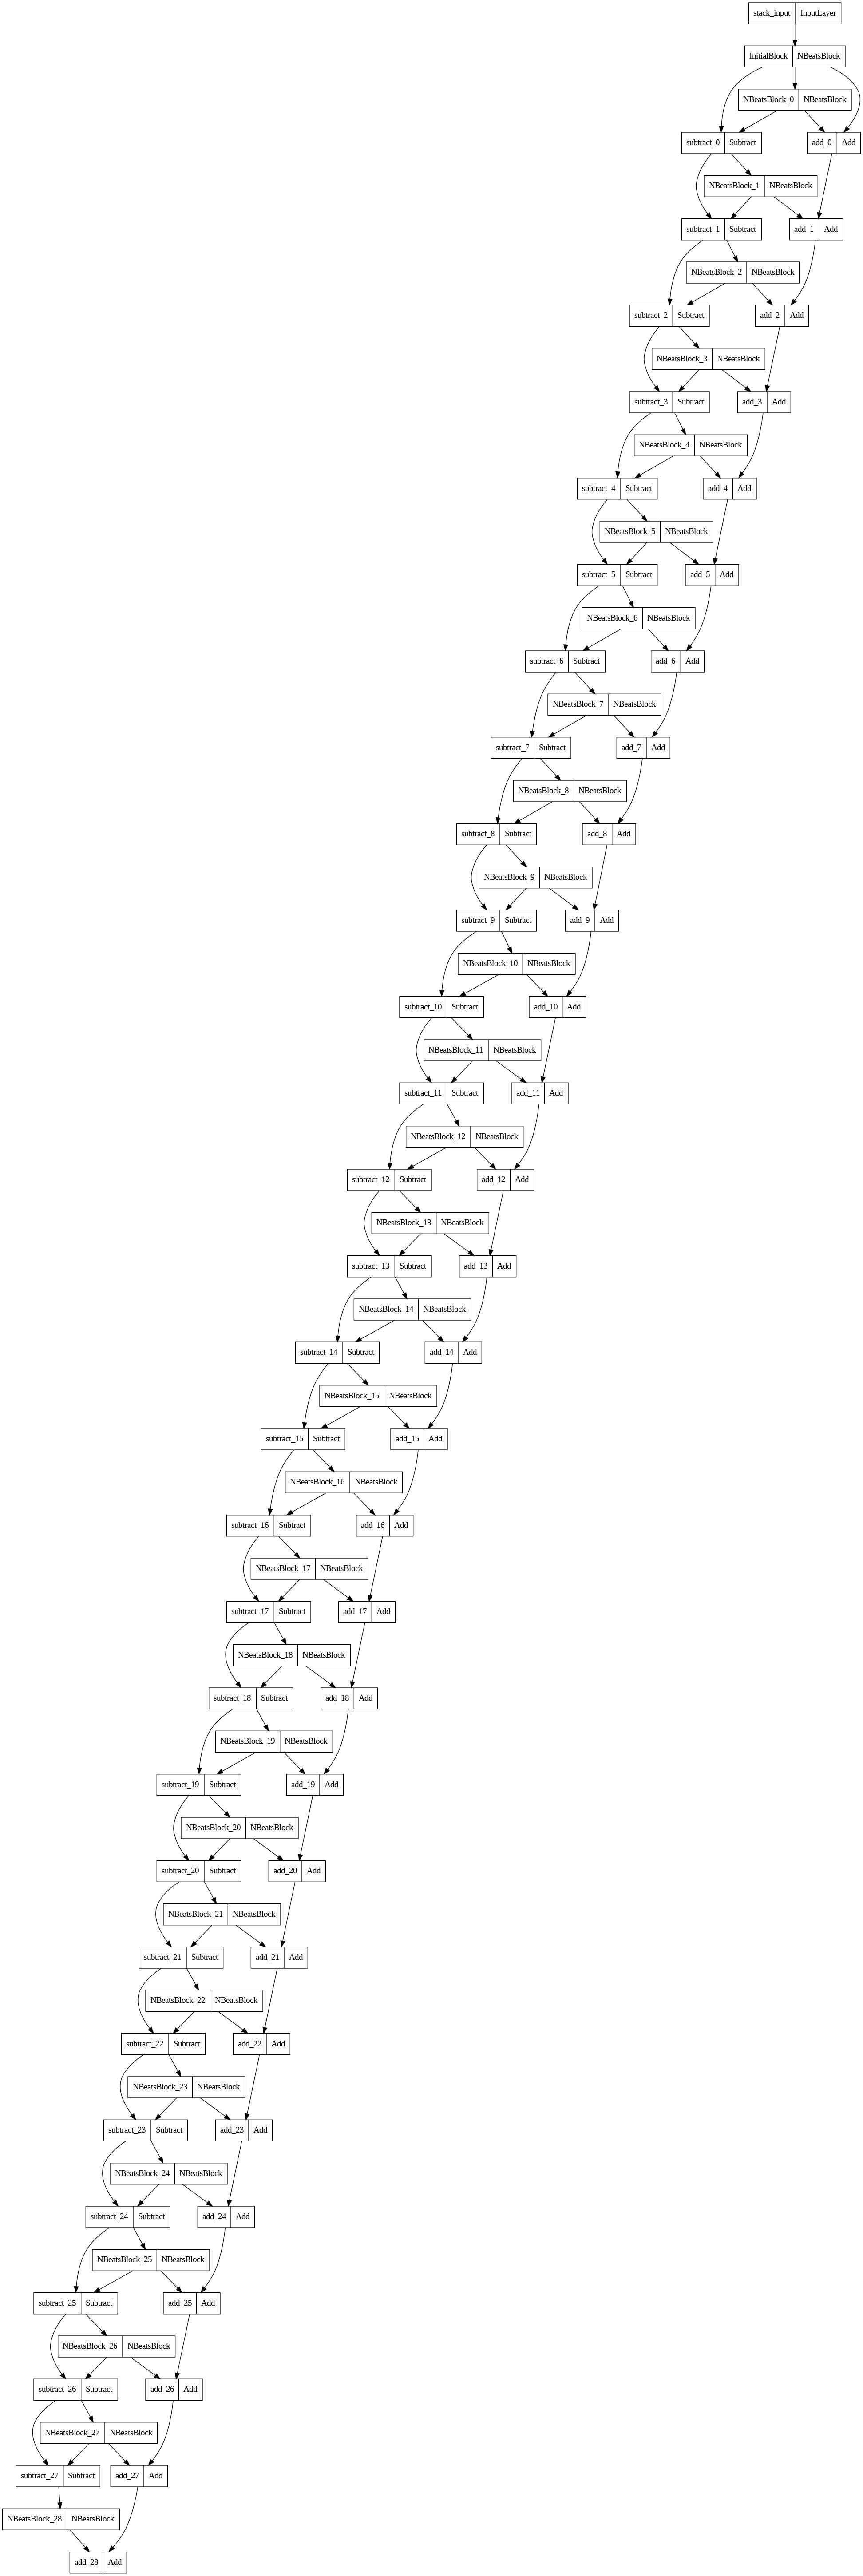

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking different models together)

An ensemble leverages the wisdom of the crowd effect.

It combines many *different* models to predict a common goal.

### Constructing and fitting and ensemble of models (using different loss functions)


In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):

    """
    Returns a list of num_iter models each trained on MAE, MSE, and MAPE loss.
    
    For example, if num_iter=10, a list of 30 trained models will be returned:
    10 * len(["mae", "mse", "mape"]).
    """
    # Make empty list for trained ensemble models
    ensemble_models = []

    # Create num_iter number of models per loss function
    for i in range(num_iter):
        # Build and fit a new model with a different loss function
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

            # Construct a simple model (similar to model_1)
            model = tf.keras.Sequential([
                # Initialize dense layers with normal distribution for estimating prediction intervals later on
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
                layers.Dense(HORIZON)
            ])

            # Compile simple model with current loss function
            model.compile(loss=loss_function,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae", "mse"])
            
            # Fit the current model
            model.fit(train_data,
                      epochs=num_epochs,
                      verbose=0,
                      validation_data=test_data,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                  patience=200,
                                                                  restore_best_weights=True),
                                 tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                      patience=100,
                                                                      verbose=1)])
            # Append fitted motel to list of ensemble models
            ensemble_models.append(model)
        
    return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 444: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 379: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 479: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 183: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 620: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 720: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 887: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 987: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 584: ReduceLROnPl

### Make predictions with our ensemble model

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 41ms/step
CPU times: user 695 ms, sys: 28.4 ms, total: 724 ms
Wall time: 822 ms


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8820.634 ,  8828.119 ,  9036.821 , ..., 50208.42  , 48439.074 ,
        46220.26  ],
       [ 8704.179 ,  8740.126 ,  9080.383 , ..., 49664.02  , 47806.85  ,
        46140.125 ],
       [ 8724.873 ,  8794.324 ,  9062.572 , ..., 50517.86  , 48426.477 ,
        46573.96  ],
       ...,
       [ 8744.492 ,  8837.924 ,  9052.541 , ..., 49940.297 , 49175.996 ,
        46610.8   ],
       [ 8816.707 ,  8758.191 ,  9020.959 , ..., 49778.18  , 48054.62  ,
        45463.69  ],
       [ 8798.968 ,  8784.2705,  9083.062 , ..., 50722.38  , 48743.152 ,
        46926.918 ]], dtype=float32)>

Our ensemble preds comes out in multiple dimensions but to combine into **point predictions** we can leverage the mean of all of the predictions or the median.

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean

<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8770.098 ,  8773.287 ,  9067.469 ,  8703.787 ,  8725.563 ,
        8739.654 ,  8648.155 ,  8471.829 ,  8451.976 ,  8520.628 ,
        8184.534 ,  8089.5   ,  8052.7837,  7606.9893,  7271.684 ,
        7300.68  ,  7065.648 ,  7209.102 ,  7113.8115,  7531.022 ,
        7397.984 ,  7733.6104,  7567.184 ,  7377.3267,  7321.4854,
        7306.236 ,  7194.385 ,  7389.0874,  7518.0474,  7535.37  ,
        7548.1973,  7328.1235,  7224.7173,  7176.489 ,  7176.1724,
        7225.33  ,  7074.479 ,  7095.6587,  6863.502 ,  6575.8174,
        7400.8623,  7159.6353,  7124.823 ,  7273.6426,  7261.967 ,
        7185.5366,  7227.3076,  7210.877 ,  7168.768 ,  7216.2583,
        7311.2427,  7386.969 ,  7241.839 ,  7164.5225,  7162.345 ,
        6936.5825,  7275.5215,  7344.858 ,  7347.297 ,  7718.298 ,
        8068.084 ,  8128.823 ,  7834.8076,  8087.7266,  8108.2524,
        8150.577 ,  8104.5493,  8745.341 ,  8902.181 ,  8746.918 ,
        8925.2

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median

array([ 8772.095 ,  8784.2705,  9062.572 ,  8715.752 ,  8724.743 ,
        8750.353 ,  8653.1045,  8482.273 ,  8456.387 ,  8516.854 ,
        8199.759 ,  8092.9995,  8063.8223,  7612.41  ,  7265.78  ,
        7295.0464,  7063.577 ,  7202.1895,  7099.514 ,  7526.8325,
        7402.254 ,  7732.5225,  7577.915 ,  7374.454 ,  7336.8164,
        7307.4224,  7205.5728,  7395.9985,  7526.574 ,  7539.1514,
        7556.414 ,  7330.5576,  7235.272 ,  7185.861 ,  7179.202 ,
        7229.317 ,  7085.6523,  7098.954 ,  6876.9277,  6571.3804,
        7395.83  ,  7163.1753,  7121.531 ,  7276.826 ,  7259.332 ,
        7201.247 ,  7235.034 ,  7208.965 ,  7178.898 ,  7219.6367,
        7312.112 ,  7391.9873,  7247.3887,  7166.473 ,  7169.0576,
        6953.7427,  7282.525 ,  7344.893 ,  7352.206 ,  7717.1196,
        8080.1855,  8136.897 ,  7837.494 ,  8099.372 ,  8108.362 ,
        8159.152 ,  8120.314 ,  8745.209 ,  8908.424 ,  8748.537 ,
        8930.774 ,  8966.525 ,  8666.112 ,  8636.159 ,  8705.1

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_test,
                                  ensemble_mean)
ensemble_results

{'MAE': 566.0334,
 'MAPE': 2.5660465,
 'MASE': 0.9943639,
 'MSE': 1139365.9,
 'RMSE': 1067.4108}

In [ ]:
# Evaluate ensemble model predictions
ensemble_results = evaluate_preds(y_test,
                                  ensemble_median)
ensemble_results

{'MAE': 565.2828,
 'MAPE': 2.5574727,
 'MASE': 0.9930453,
 'MSE': 1135530.8,
 'RMSE': 1065.6128}

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

So far we've been making point predictions with out models.

E.g. horizon = 1, our model predicts tomorrow's price of Bitcoin will be $50,000USD

Wouldn't it be helpful if we knew a range of where that prediciton came from?

Instead of 50,000 USD on the dot, how about 48,000 to 52,000 USD?

One way to get the 95% confidence prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly intialized models (we've got this tanks to our ensemble models)
2. Measure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming the distribution is Gaussian/Normal, 7% of observations fall within 1.96 standard deviations of the mean)
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/meadian of the predictions made in (1)



In [ ]:
# Find upper and lower bounds of ensemble predictions
# Take the predictions from a number of randomly initialized models
def get_upper_lower(preds):

    # 2. Measure the standard deviation of the predictions
    std = tf.math.reduce_std(preds, axis=0)

    # 3. Multiply the standard deviation by 1.96
    interval = 1.96 * std

    # 4. Get the prediction interval upper and lower bounds
    preds_mean= tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    
    return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% percent prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)

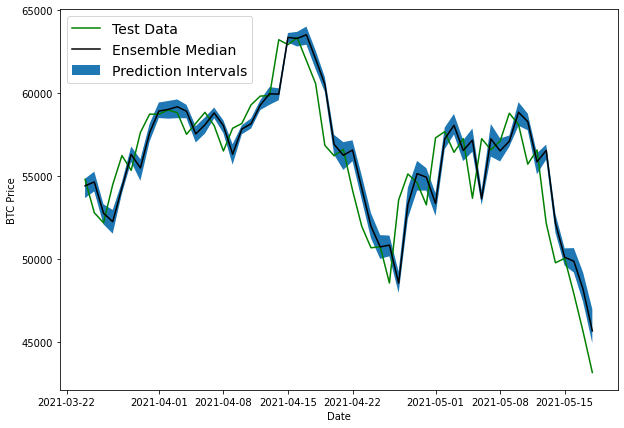

In [ ]:
# Get the median/mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# # Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset = 500
plt.figure(figsize=(10, 7 ))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
# To plot the upper and lower bounds, let's use fill_between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)

Hmm...

So far all of our models predictions have been lagging behind the test data...

As is they're replicating what the naive model does and just predict the previous timestep as the next timestep
> **Note:** These prediction intervals are estimates themselves. And they have been created with the assumption that our model's data is from a normal distribution.

## Aside: two types of uncertainty (coconut and subway)

Uncertainty estimates in machine learning seek out to qualitatively and quantitatively answer the questions:
1. What can my model know? (with perfect data, what's possible for a model to learn?)
2. What doesn't my model know? (what can a model never predict? Or would it be helpful if a model could tell you that when it's mkaing a prediction, it doesn't actually know if it's right or not?)

There are two major types of uncertainty in machine learning you should know about:
* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced and it is often referred as data uncertainty or subway uncertainty
* **Epistemic uncertainty** - this type of uncertainty can be reduced, it also referred to as "model" or "coconut" uncertainty

## Model 9: Train a model on the full historical data to make predictions into the future

So far all of our models have predicted on the test dataset, this is only a pseudofuture.

Let's now build a model which is capable of predicting into the future!

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2780, 2780)

In [ ]:
X_all[:5], y_all[:5]

(array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
         123.65499],
        [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
         125.455  ],
        [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
         108.58483],
        [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
         118.67466],
        [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
         121.33866]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [ ]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

# Create model 
model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_9_future_model")

# Compile 
model_9.compile(loss="mae",
                optimizer="adam")

# Fit
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14

To make predictions into the future we want a function which:

1. Takes as input:
  * a list of values (Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the function, when it's full of predictions) and extractsthe last `WINDOW_SIZE` values from the input values
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
    """
    Make future forecasts into_future steps after values ends.

    Returns future forecasts as a list of floats.
    """
    # 2. Create an empty list for future forecasts/prepare data to forecast on
    future_forecast = []
    last_window = values[-WINDOW_SIZE:]

    # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on 
    for _ in range(INTO_FUTURE):
        # Predict on the last window then append it again, again, again (our model will evetually start to make forecastson its own forecast)
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

        # Append predictions to future_forecast
        future_forecast.append(tf.squeeze(future_pred).numpy())

        # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
    
    return future_forecast

In [ ]:
# Make forecasts into the future
future_forecast = make_future_forecasts(y_all,
                                        model_9,
                                        INTO_FUTURE,
                                        WINDOW_SIZE)
future_forecast

1/1 [==============================] - 0s 35ms/step
Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 56402.45703125

1/1 [==============================] - 0s 33ms/step
Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 56402.45703125] -> Prediction: 51060.671875

1/1 [==============================] - 0s 31ms/step
Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 56402.45703125 51060.671875  ] -> Prediction: 51444.4921875

1/1 [==============================] - 0s 29ms/step
Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 56402.45703125 51060.671875   51444.4921875 ] -> Prediction: 47611.68359375

1/1 [==============================] - 0s 33ms/step
Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 56402.45703125
 51060.671875   51444.4921875  47611.68359375]

[56402.457,
 51060.67,
 51444.492,
 47611.684,
 47372.91,
 45863.996,
 47021.19,
 55816.715,
 50765.496,
 51439.445,
 45920.676,
 47665.145,
 46670.824,
 50126.914]

### Plot future forecasts

In [ ]:
future_forecast

[56402.457,
 51060.67,
 51444.492,
 47611.684,
 47372.91,
 45863.996,
 47021.19,
 55816.715,
 50765.496,
 51439.445,
 45920.676,
 47665.145,
 46670.824,
 50126.914]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """
  start_date = start_date + np.timedelta64(offset, "D") # specifiy start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start and end date


In [ ]:
# Last timestep of timesteps (currently np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# Get next two week of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
# Insert last timestep/final price into next time steps and futureforecasts so the plot doesn't look janky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-18', '2021-05-19', '2021-05-20',
        '2021-05-21', '2021-05-22', '2021-05-23', '2021-05-24',
        '2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
        '2021-05-29', '2021-05-30', '2021-05-31', '2021-06-01'],
       dtype='datetime64[D]'),
 array([43144.473, 43144.473, 56402.457, 51060.67 , 51444.492, 47611.684,
        47372.91 , 45863.996, 47021.19 , 55816.715, 50765.496, 51439.445,
        45920.676, 47665.145, 46670.824, 50126.914], dtype=float32))

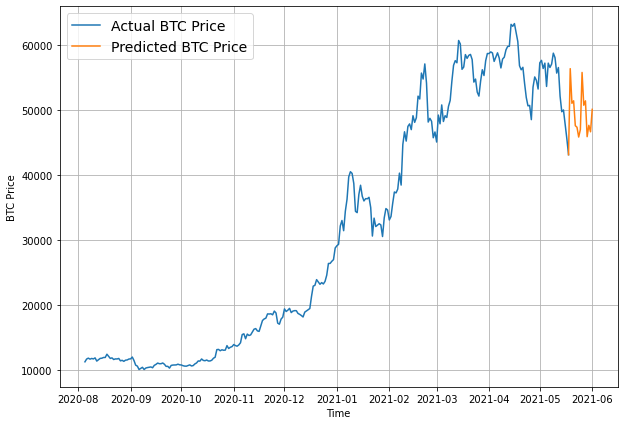

In [ ]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Why forecasting is BS (the turkey problem)

In [ ]:
# Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

In [ ]:
# Manufacture an extra price on the end (to showcase our Turkey problem)
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
# Get the timesteps for tue turkey problem
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

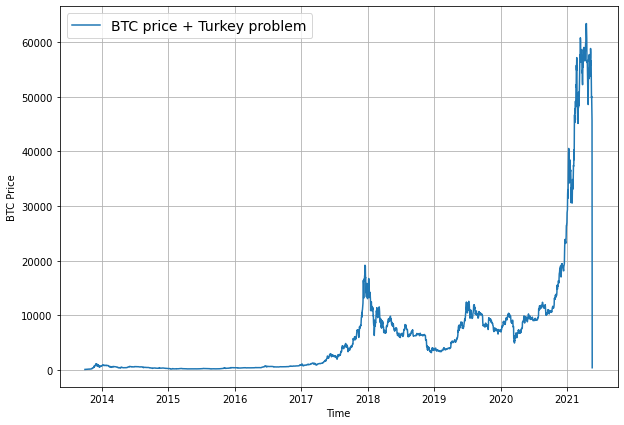

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC price + Turkey problem")

In [ ]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)


In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_179 (Dense)           (None, 128)               1024      
                                                                 
 dense_180 (Dense)           (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


### Build a turkey model (model to predict on turkey data)

In [ ]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer="adam")
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 798.9500


798.949951171875

In [ ]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 642.7048


642.704833984375

In [ ]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8846.441, 8755.258, 9017.268, 8796.487, 8752.442, 8725.602,
       8685.413, 8521.601, 8454.185, 8523.009], dtype=float32)>

In [ ]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_test,
                                turkey_preds)
turkey_results

{'MAE': 17140.55,
 'MAPE': 121.51843,
 'MASE': 26.52506,
 'MSE': 615254460.0,
 'RMSE': 23736.607}

In [ ]:
model_1_results

{'MAE': 562.255,
 'MAPE': 2.5097995,
 'MASE': 0.98772633,
 'MSE': 1152010.6,
 'RMSE': 1073.3175}

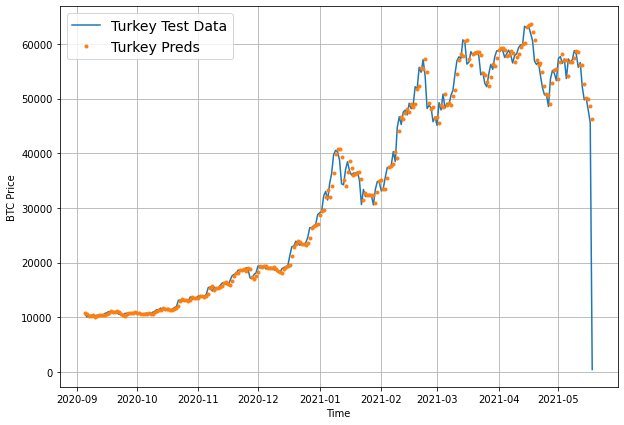

In [ ]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(btc_timesteps_turkey[-len(X_test):],
                 btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

## Compare models

In [ ]:
# Compare different model results (w = window, h = horizon)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,MAE,MAPE,MASE,MSE,RMSE
naive_model,567.980225,2.516525,0.999570,1.147547e+06,1071.236206
model_1_dense_w7_h1,562.255005,2.509799,0.987726,1.152011e+06,1073.317505
model_2_dense_w30_h1,599.002747,2.684652,1.047063,1.257014e+06,1121.166260
model_3_dense_w30_h7,1246.863647,5.669653,2.218724,5.457904e+06,1440.583008
model_4_CONV1D,566.550293,2.529747,0.995272,1.168738e+06,1081.081665
model_5_LSTM,581.870422,2.615439,1.022185,1.220273e+06,1104.659790
model_6_multivariate,564.772705,2.548141,0.992149,1.156108e+06,1075.224487
model_7_NBEATS,576.149109,2.591045,1.012134,1.189879e+06,1090.815552
model_8_ensemble,565.282776,2.557473,0.993045,1.135531e+06,1065.612793
model_10_turkey,17140.550781,121.518433,26.525061,6.152545e+08,23736.607422


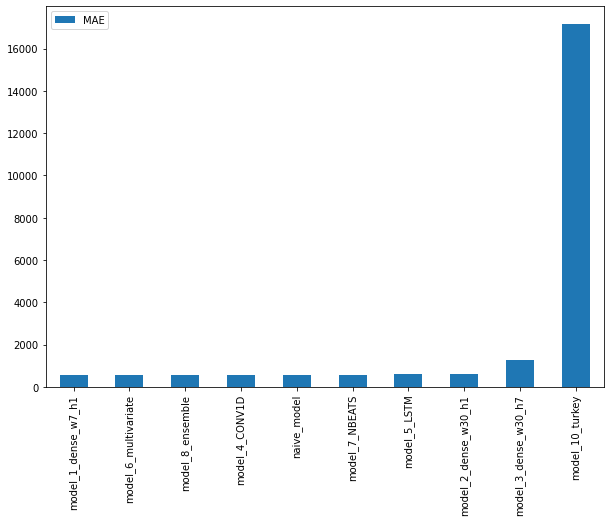

In [ ]:
# Sort model reuslts by MAE and plot them
model_results[["MAE"]].sort_values(by="MAE").plot(figsize=(10, 7), kind="bar")